In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import rescale, resize, downscale_local_mean
import sys
sys.path.insert(1, '../ML_Training')
sys.path.insert(2, '../GBT_pipeline')
from synthetic_real_dynamic import create_true, create_full_cadence, create_false, create_true_single_shot, create_true_faster


In [40]:
NUM_SAMPLES = 1
# plate = np.random.rand(NUM_SAMPLES, 6,16,256)
plate = np.load('../../real_filtered.npy')

print(plate.shape)
print("Creating True")
data = create_full_cadence(create_true_faster, plate = plate, samples = NUM_SAMPLES,  snr_base=20, snr_range=10, factor =1)


(19423, 6, 16, 2048)
Creating True


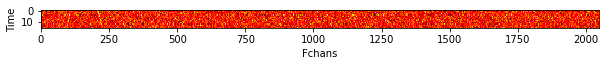

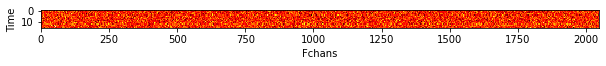

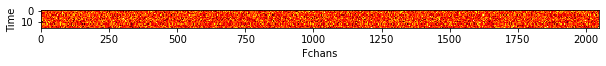

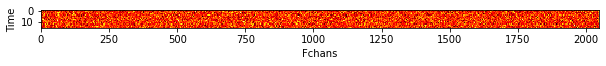

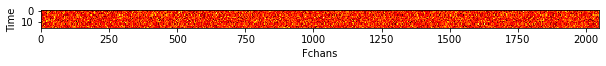

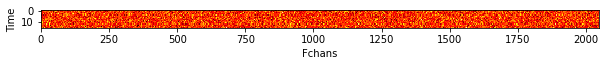

In [47]:
%matplotlib inline
import random 
for i in range(6):
    plt.figure(figsize=(10,4))
    plt.xlabel("Fchans")
    plt.ylabel("Time")
    plt.imshow(data[0,i,:,:], interpolation='nearest', cmap=plt.get_cmap('hot'), aspect=4)
    plt.show()

In [42]:
factor = 4
data_resize = np.zeros((1,6,data.shape[2],data.shape[3]//factor))
for i in range(6):
#     data_resize[0,i,:,:] = resize(data[0,i,:,:], (data.shape[2],data.shape[3]//factor),
#                        anti_aliasing=True)
    data_resize[0,i,:,:] = downscale_local_mean(data[0,i,:,:], (1, factor))

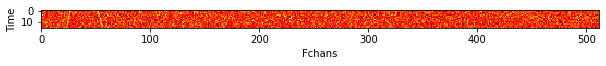

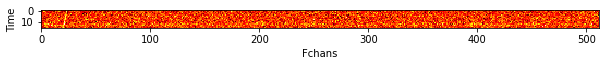

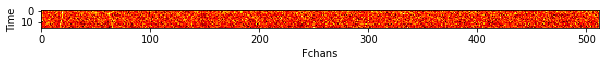

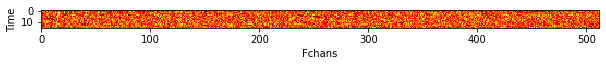

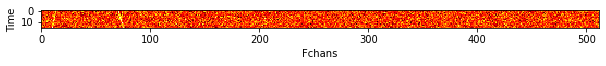

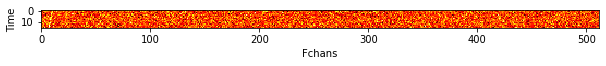

In [43]:
%matplotlib inline
import random 
for i in range(6):
    plt.figure(figsize=(10,4))
    plt.xlabel("Fchans")
    plt.ylabel("Time")
    plt.imshow(data_resize[0,i,:,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
    plt.show()

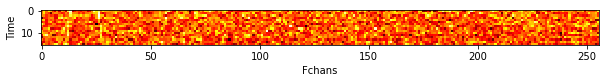

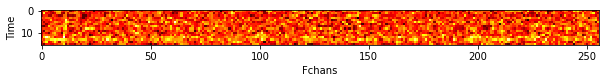

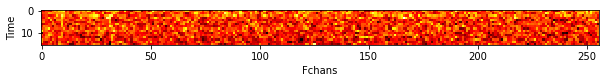

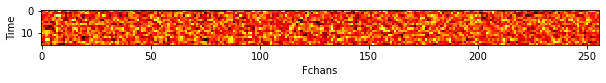

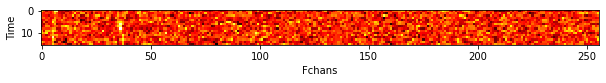

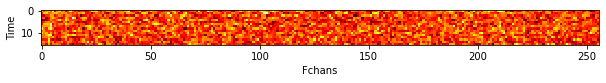

In [44]:
factor = 8
data_resize = np.zeros((1,6,data.shape[2],data.shape[3]//factor))
for i in range(6):
    data_resize[0,i,:,:] = resize(data[0,i,:,:], (data.shape[2],data.shape[3]//factor),
                       anti_aliasing=True)

    
for i in range(6):
    plt.figure(figsize=(10,4))
    plt.xlabel("Fchans")
    plt.ylabel("Time")
    plt.imshow(data_resize[0,i,:,:], interpolation='nearest', cmap=plt.get_cmap('hot'))
    plt.show()

In [49]:
dummy  = np.random.rand(6,16,1,40370176)

In [52]:
from time import time 
factor = 4
test =  np.zeros((6,16,1,40370176//factor))
start = time()
for i in range(6):
    test[i,:,0,:] = resize(dummy[i,:,0,:], (dummy.shape[2],dummy.shape[3]//factor),anti_aliasing=True)
print(time()-start)
print(test[0,i,:,:].shape)

230.7562346458435
(1, 10092544)


In [ ]:
from time import time 
factor = 4
test =  np.zeros((6,16,1,40370176//factor))
start = time()
for i in range(6):
    test[i,:,0,:] = downscale_local_mean(data[i,:,0,:], (1,factor))
    
print(time()-start)
print(test[0,i,:,:].shape)

In [53]:
def resize_data(data, factor, index):
    return resize(data[index,:,0,:], (data.shape[2],data.shape[3]//factor),
                       anti_aliasing=True)

In [71]:
from numba import jit, prange, njit

@jit(parallel=True)
def resize_par(data, factor):
    test =  np.zeros((6,data.shape[1],1,data.shape[3]//factor))
    print(data.shape, test.shape)
    for i in prange(6):
        test[i,:,0,:] = downscale_local_mean(data[i,:,0,:], (1,factor))
    return test
start = time()
stuff = resize_par(dummy, factor=4)
print(time()-start)

numba.core.transforms INFO     finding looplift candidates


<ipython-input-71-d475748d8936>:3: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "resize_par" failed type inference due to: Untyped global name 'downscale_local_mean': Cannot determine Numba type of <class 'function'>

File "<ipython-input-71-d475748d8936>", line 8:
def resize_par(data, factor):
    <source elided>
    for i in prange(6):
        test[i,:,0,:] = downscale_local_mean(data[i,:,0,:], (1,factor))
        ^

  @jit(parallel=True)
<ipython-input-71-d475748d8936>:3: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "resize_par" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-71-d475748d8936>", line 7:
def resize_par(data, factor):
    <source elided>
    print(data.shape, test.shape)
    for i in prange(6):
    ^

  @jit(parallel=True)
/home/pma/.local/lib/python3.6/site-packages/numba/core/obj

(6, 16, 1, 40370176) (6, 16, 1, 10092544)


<ipython-input-71-d475748d8936>:3: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "resize_par" failed type inference due to: Untyped global name 'downscale_local_mean': Cannot determine Numba type of <class 'function'>

File "<ipython-input-71-d475748d8936>", line 8:
def resize_par(data, factor):
    <source elided>
    for i in prange(6):
        test[i,:,0,:] = downscale_local_mean(data[i,:,0,:], (1,factor))
        ^

  @jit(parallel=True)
/home/pma/.local/lib/python3.6/site-packages/numba/core/object_mode_passes.py:152: NumbaWarning: Function "resize_par" was compiled in object mode without forceobj=True.

File "<ipython-input-71-d475748d8936>", line 7:
def resize_par(data, factor):
    <source elided>
    print(data.shape, test.shape)
    for i in prange(6):
    ^

  state.func_ir.loc))
/home/pma/.local/lib/python3.6/site-packages/numba/core/object_mode_passes.py:162: NumbaDeprecationWarning: 
Fall-back from the nopython comp

37.77953505516052


In [3]:
data = np.random.rand(2, 16, 2048, 1)

def resize_par(data, factor):
    test =  np.zeros((6,data.shape[1],1,data.shape[3]//factor))
    print(data.shape, test.shape)
    for i in range(6):
        test[i,:,0,:] = downscale_local_mean(data[i,:,0,:], (1,factor))
    return test

stuff = resize_par(data, factor=4)


(2, 16, 2048, 1) (6, 16, 1, 0)


IndexError: index 2 is out of bounds for axis 0 with size 2

In [57]:
from multiprocessing import Pool
import functools

start = time()
factor=4
with Pool(6) as p:
        result = p.map(functools.partial(resize_data,dummy, factor), range(6))
print(time()-start)


Process ForkPoolWorker-116:
Process ForkPoolWorker-115:
Process ForkPoolWorker-114:
Process ForkPoolWorker-113:
Process ForkPoolWorker-111:
Process ForkPoolWorker-112:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/lib/python3.6/multiprocessing/process.p

KeyboardInterrupt: 